In [1]:
import pandas as pd

from helper_functions_general import read_data, get_impl_date
from definitions import data_path, show_plots, data_source_path, figures_path_res, \
    treatment_countries, fig_size, show_plots, save_figs, show_results, date_col, country_col
from plot_functions import plot_corr

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [2]:
def flatten(lst):
    return np.array([item for sublist in lst for item in sublist])

In [3]:
timeframe = 'm'
treatment_country = 'switzerland'
target_var = 'co2'
diff_level, diff_order = 12, 1
date_start = '2001-01-01'

In [4]:
df_raw = read_data(data_path, f'total_{timeframe}')
df = df_raw.copy()
df

,country,date,year,month,co2,gdp,pop,co2_cap,gdp_cap
0,austria,2000-01-01,2000,1,9.726928e+09,2.309478e+11,8.003000e+09,1.215410,28.857653
1,austria,2000-02-01,2000,2,8.532685e+09,2.321217e+11,8.004700e+09,1.065959,28.998180
2,austria,2000-03-01,2000,3,8.134567e+09,2.332957e+11,8.006400e+09,1.016008,29.138647
3,austria,2000-04-01,2000,4,6.546738e+09,2.344696e+11,8.008100e+09,0.817514,29.279055
4,austria,2000-05-01,2000,5,5.603262e+09,2.352176e+11,8.010100e+09,0.699525,29.365122
...,...,...,...,...,...,...,...,...,...
4517,united kingdom,2019-06-01,2019,6,2.864851e+10,3.302814e+12,6.684433e+10,0.428585,49.410534
4518,united kingdom,2019-07-01,2019,7,2.872032e+10,3.322513e+12,6.686800e+10,0.429508,49.687638
4519,united kingdom,2019-08-01,2019,8,2.809851e+10,3.338771e+12,6.689167e+10,0.420060,49.913109
4520,united kingdom,2019-09-01,2019,9,3.070698e+10,3.355029e+12,6.691533e+10,0.458893,50.138420


In [5]:
df_stat_raw = read_data(data_path, f'total_{timeframe}_stat')
df_stat = df_stat_raw.copy()
df_stat

,country,date,year,month,co2,gdp,pop
0,austria,2001-01-01,2001,1,-0.019138,0.029099,-99999.0
1,austria,2001-02-01,2001,2,0.039611,0.023861,-99999.0
2,austria,2001-03-01,2001,3,0.022160,0.018648,-99999.0
3,austria,2001-04-01,2001,4,0.119718,0.013460,-99999.0
4,austria,2001-05-01,2001,5,0.024326,0.011493,-99999.0
...,...,...,...,...,...,...,...
4313,united kingdom,2019-06-01,2019,6,-0.017357,-99999.000000,-99999.0
4314,united kingdom,2019-07-01,2019,7,-0.034553,-99999.000000,-99999.0
4315,united kingdom,2019-08-01,2019,8,-0.020662,-99999.000000,-99999.0
4316,united kingdom,2019-09-01,2019,9,-0.005156,-99999.000000,-99999.0


<AxesSubplot:xlabel='date'>

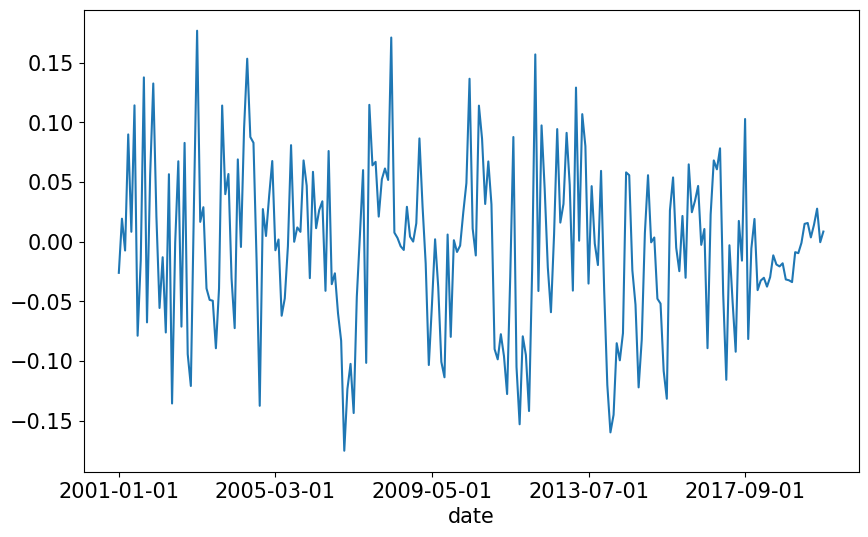

In [6]:
target_diff = df_stat[df_stat[country_col] == treatment_country].set_index(date_col)[target_var]
target_diff.plot(figsize=fig_size)

<AxesSubplot:xlabel='date'>

<Figure size 1000x600 with 0 Axes>

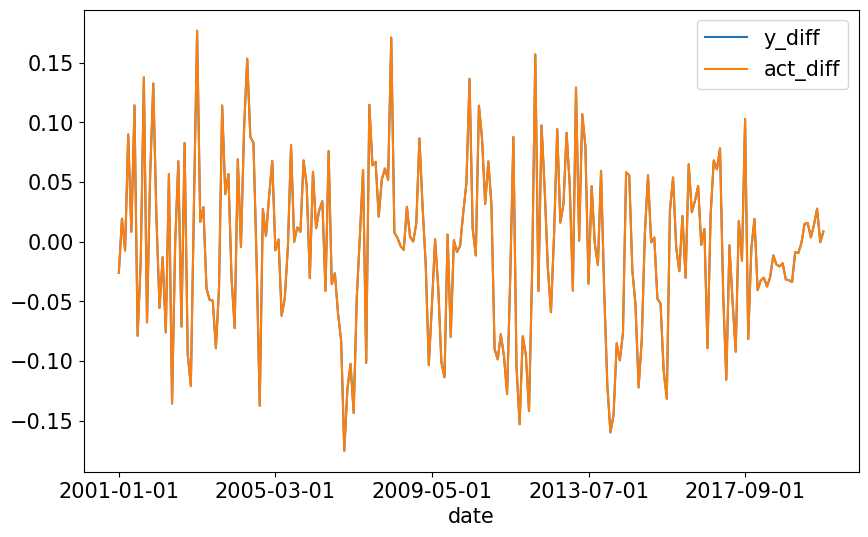

In [7]:
# orig = df_stat[(df_stat['country']==treatment_country) & (df_stat['date']>=date_start)].set_index('date')[target_var]
# orig.plot(figsize=fig_size)

target_diff = df_stat[df_stat[country_col] == treatment_country].set_index(date_col)[target_var]
y_diff = np.array(target_diff).reshape(-1, 1)
y_diff = flatten(y_diff)
plt.figure(figsize=fig_size)

act_pred_diff = pd.read_csv(f'output/tables/results/{treatment_country}/{treatment_country}_act_pred_diff.csv')
act_pred_diff
act_diff = act_pred_diff.set_index('date')['act']

compare = pd.DataFrame(list(zip(y_diff, act_diff)),
                       columns=['y_diff', 'act_diff']).set_index(target_diff.index)

compare.plot(figsize=fig_size)

                     act       act_new
date                                  
2001-01-01  5.470914e+09  5.470914e+09
2001-02-01  5.053050e+09  5.053050e+09
2001-03-01  4.779852e+09  4.779852e+09
2001-04-01  4.646748e+09  4.646748e+09
2001-05-01  3.597037e+09  3.597037e+09
2001-06-01  3.428529e+09  3.428529e+09
2001-07-01  2.980008e+09  2.980008e+09
2001-08-01  2.804730e+09  2.804730e+09
2001-09-01  3.842126e+09  3.842126e+09
2001-10-01  3.870048e+09  3.870048e+09
2001-11-01  5.109718e+09  5.109718e+09
2001-12-01  5.793218e+09  5.793218e+09
2002-01-01  5.588088e+09  5.588088e+09
2002-02-01  4.779855e+09  4.779855e+09
2002-03-01  4.717928e+09  4.717928e+09
2002-04-01  4.306166e+09  4.306166e+09
2002-05-01  3.806308e+09  3.806308e+09
2002-06-01  2.993583e+09  2.993583e+09
2002-07-01  2.977351e+09  2.977351e+09
2002-08-01  3.000330e+09  3.000330e+09
2002-09-01  3.577985e+09  3.577985e+09
2002-10-01  4.204157e+09  4.204157e+09
2002-11-01  4.650105e+09  4.650105e+09
2002-12-01  5.133111e+09 

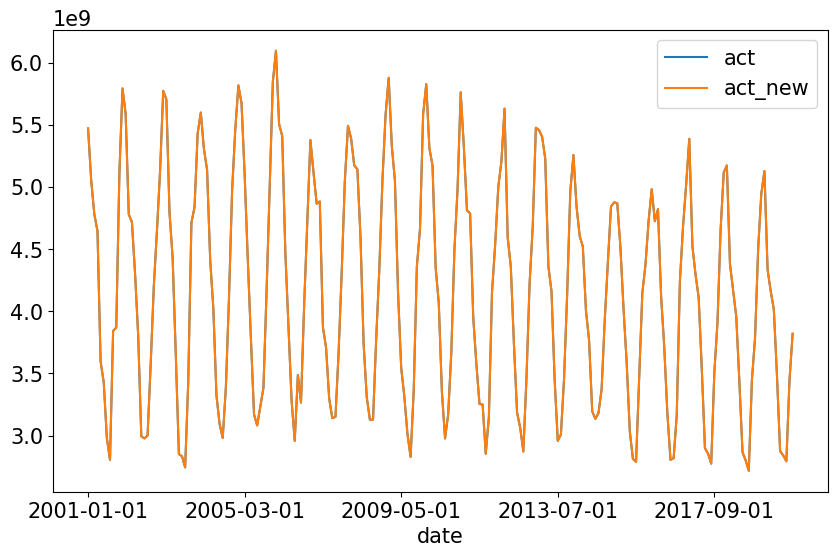

In [8]:
col = 'act'

orig = df[(df['country']==treatment_country) & (df['date']>=date_start)].set_index('date')[target_var]

orig_log = np.log(orig)

orig_log_diff1 = orig_log.diff(diff_level)

orig_log_diff2 = orig_log_diff1.diff(diff_level)

orig_log_diff2_stand = flatten(SS.fit_transform(np.array(orig_log_diff2).reshape(-1, 1))).reshape(-1, 1)

orig_log_diff2_new = flatten(SS.inverse_transform(orig_log_diff2_stand))

orig_log_diff1_new = np.zeros(len(orig_log_diff1))
orig_log_diff1_new[diff_level:2*diff_level] = orig_log_diff1[diff_level:2*diff_level]
for i in range(2*diff_level, len(orig_log_diff1)):
    orig_log_diff1_new[i] = orig_log_diff1_new[i-diff_level] + orig_log_diff2_new[i]

orig_log_new = np.zeros(len(orig_log))
orig_log_new[:diff_level] = orig_log[:diff_level]
for i in range(diff_level, len(orig_log)):
    orig_log_new[i] = orig_log_new[i-diff_level] + orig_log_diff1_new[i]

orig_new = np.exp(orig_log_new)
    
    
    
    
    
# test = orig_log_diff2_stand
test = pd.DataFrame(list(zip(orig, orig_new)),
                                 columns=[col, f'{col}_new']).set_index(orig.index)
print(test[:50])
if type(test) in [list, np.ndarray]:
    plt.figure(figsize=fig_size)
    plt.plot(test)
else:
    test.plot(figsize=fig_size)

In [9]:
act_pred_diff

,date,act,pred,error
0,2001-01-01,-0.026118,-0.017026,0.009091
1,2001-02-01,0.019276,0.010672,-0.008604
2,2001-03-01,-0.007401,0.006696,0.014097
3,2001-04-01,0.089918,0.062055,-0.027863
4,2001-05-01,0.008302,-0.016388,-0.024689
...,...,...,...,...
221,2019-06-01,0.003582,0.019515,0.015934
222,2019-07-01,0.014090,0.025680,0.011591
223,2019-08-01,0.027670,0.015330,-0.012341
224,2019-09-01,-0.000445,0.017189,0.017634


                pred  pred_new
date                          
2001-01-01       NaN -0.017026
2001-02-01       NaN  0.010672
2001-03-01       NaN  0.006696
2001-04-01       NaN  0.062055
2001-05-01       NaN -0.016388
...              ...       ...
2019-06-01  0.015029  0.019515
2019-07-01  0.033202  0.025680
2019-08-01  0.048405  0.015330
2019-09-01  0.017673  0.017189
2019-10-01  0.040138  0.005037

[226 rows x 2 columns]


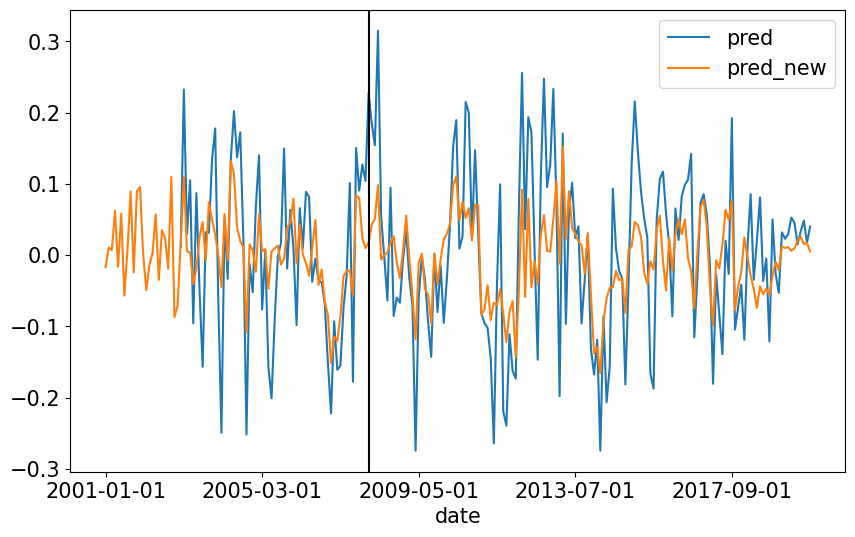

In [10]:
col = 'pred'

orig = df[(df['country']==treatment_country) & (df['date']>=date_start)].set_index('date')[target_var]

orig_log = np.log(orig)

orig_log_diff1 = orig_log.diff(diff_level)

orig_log_diff2 = orig_log_diff1.diff(diff_level)

orig_log_diff2_stand = flatten(np.array(SS.fit_transform(np.array(orig_log_diff2).reshape(-1, 1))))

orig_log_diff2_new = flatten(np.array(act_pred_diff[col]).reshape(-1, 1)) #PRED ==================================

# orig_log_diff1_new = np.zeros(len(orig_log_diff1))
# orig_log_diff1_new[diff_level:2*diff_level] = orig_log_diff1[diff_level:2*diff_level]
# for i in range(2*diff_level, len(orig_log_diff1)):
#     orig_log_diff1_new[i] = orig_log_diff1_new[i - diff_level] + orig_log_diff2_new[i]

# orig_log_new = np.zeros(len(orig_log))
# orig_log_new[:diff_level] = orig_log[:diff_level]
# for i in range(diff_level, len(orig_log)):
#     orig_log_new[i] = orig_log[i - diff_level] + orig_log_diff1_new[i]

# orig_new = np.exp(orig_log_new)
    
    
    
    
    
# test = orig_log_diff2_stand
test = pd.DataFrame(list(zip(orig_log_diff2, orig_log_diff2_new)),
                                 columns=[col, f'{col}_new']).set_index(orig.index)
print(test)
if type(test) in [list, np.ndarray]:
    plt.figure(figsize=fig_size)
#     plt.axvline(x=list(test.index).index(get_impl_date(treatment_country)), c='black')
    plt.plot(test)
else:
    test.plot(figsize=fig_size)
    plt.axvline(x=list(test.index).index(get_impl_date(treatment_country)), c='black')

In [11]:
list(test.index)
list(test.index).index(get_impl_date(treatment_country))

84

In [12]:
# orig_log_diff2_stand = flatten(np.array(SS.fit_transform(np.array(orig_log_diff2).reshape(-1, 1))))

# orig_log_diff2_stand_new = np.array(act_pred_diff[col]).reshape(-1, 1) #PRED ==================================

# orig_log_diff2_new = flatten(SS.inverse_transform(orig_log_diff2_stand_new).reshape(-1, 1))
# # orig_log_diff2_new = np.array(flatten(orig_log_diff2_stand))

# orig_log_diff1_new = np.zeros(len(orig_log_diff1))
# orig_log_diff1_new[diff_level:2*diff_level] = orig_log_diff1[diff_level:2*diff_level]
# for i in range(2*diff_level, len(orig_log_diff1)):
#     orig_log_diff1_new[i] = orig_log_diff1_new[i-diff_level] + orig_log_diff2_new[i]

# orig_log_new = np.zeros(len(orig_log))
# orig_log_new[:diff_level] = orig_log[:diff_level]
# for i in range(diff_level, len(orig_log)):
#     orig_log_new[i] = orig_log_new[i-diff_level] + orig_log_diff1_new[i]
    
# orig_new = np.exp(orig_log_new)
    
    
# # test = orig_log_diff2
# test = pd.DataFrame(list(zip(orig_log_diff2_stand, orig_log_diff2_stand_new)),
#                                  columns=[col, f'{col}_new']).set_index(orig.index)
# print(test[:50])
# if type(test) in [np.ndarray]:
#     plt.figure(figsize=fig_size)
#     plt.plot(test)
# else:
#     test.plot(figsize=fig_size)

In [13]:
# orig = df[(df['country']==treatment_country) & (df['date']>=date_start)].set_index('date')[target_var]

# orig = np.log(orig)

# orig = orig_log.diff(12).diff(12)

# orig = pd.DataFrame(SS.fit_transform(np.array(orig_log_diff2).reshape(-1, 1)), columns=[col])

# orig = pd.DataFrame(flatten(SS.inverse_transform(orig)))

# orig.plot(figsize=fig_size)